In [1]:
# 导入相关的python库
import pydotplus
from pydotplus import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [61]:
# 导入iris数据，并区分特征向量X和分类目标y
iris=load_iris()
X=iris.data
y=iris.target

In [24]:
#观察对应的数据前五行数据的例子
X[1:5,:]


array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

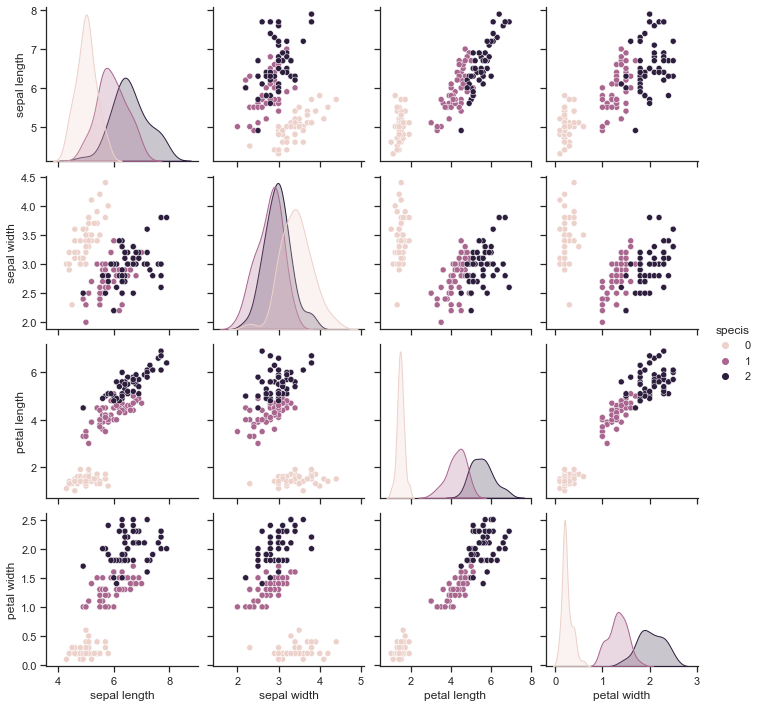

In [27]:
# 绘制对应的直方图
import seaborn as sns
import pandas as pd
sns.set_theme(style="ticks",palette="husl")
temp_X=pd.DataFrame(X)
temp_X.columns=['sepal length', 'sepal width', 'petal length', 'petal width']
temp_X['specis']=y


sns.pairplot(temp_X,hue='specis')

由上图可以看出三种iris在不同特征['sepal length', 'sepal width', 'petal length', 'petal width']下的值，会出现不同的特征，比如第0类的petal length和petal width相对较小，由此是可以进行下一步分类的依据

In [29]:
# 构建决策树模型,将生成图保存到对应的iris_classfication.png
tree_clf=DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X,y)

with open('iris_classfication.png', 'wb') as fw:
    fw.write(pydotplus.graph_from_dot_data(export_graphviz(tree_clf
                                                           ,feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
                                                           , filled=True, rounded=True,
                                                           class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])).create_png())


In [35]:
# 利用交叉验证测量决策树模型的准确率
# 由于三种花瓣的数据是均匀分布的，所以误差不会存在较大的偏差
# 但是判断决策树模型更重要的是混淆矩阵的方式评价
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf,X,y,cv=5,scoring='accuracy')

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [40]:
# 计算混淆矩阵
from sklearn.metrics import confusion_matrix
tree_clf.fit(X,y)
conf_mx=confusion_matrix(y,tree_clf.predict(X))

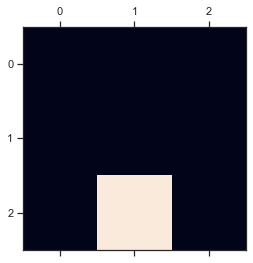

In [50]:
import numpy as np
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx)
plt.show()

计算出对应的混淆矩阵，归一化之后将对角线（即分类正确的值用0替换）最后得到的是容易分类错误的值，所以有许多照片被错误的标注为1，其中最突出的是类别2的被混淆

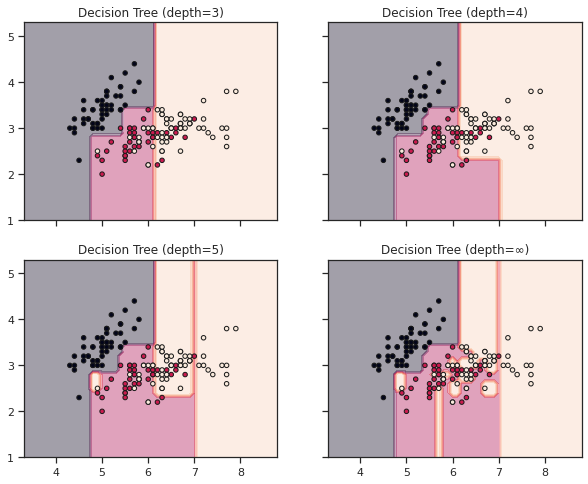

In [97]:
# 绘制分类的区域，以X的前两个特征为例子，显示随着depth变化，决策树的拟合程度
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier



def CART_region_plot(feature1,feature2):
    X=iris.data
    y=iris.target
    X=X[:,[feature1,feature2]]

    # 第一个特征和第二个特征的关系
    clf1 = DecisionTreeClassifier(max_depth=3)
    clf2 = DecisionTreeClassifier(max_depth=4)
    clf3 = DecisionTreeClassifier(max_depth=5)
    eclf = DecisionTreeClassifier()


    clf1.fit(X, y)
    clf2.fit(X, y)
    clf3.fit(X, y)
    eclf.fit(X, y)

    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
    title='CART region plot between'+str(feature1)+'and'+str(feature2) 
    plt.title(title)

    for idx, clf, tt in zip(
        product([0, 1], [0, 1]),
        [clf1, clf2, clf3, eclf],
        ["Decision Tree (depth=3)", "Decision Tree (depth=4)", "Decision Tree (depth=5)", "Decision Tree (depth=∞)"],
    ):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
        axarr[idx[0], idx[1]].set_title(tt)

    plt.show()



CART_region_plot(0,1)

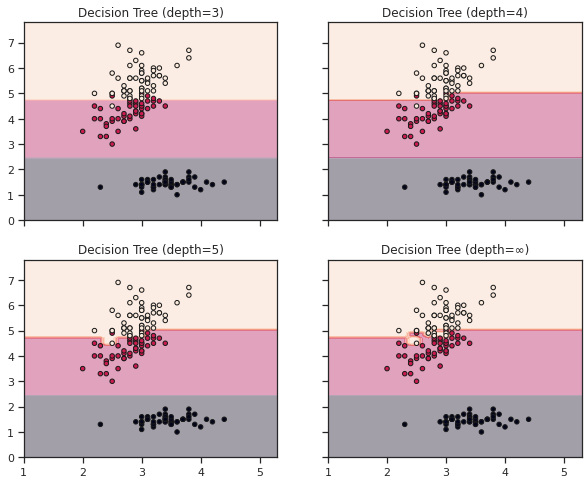

In [98]:
CART_region_plot(1,2)

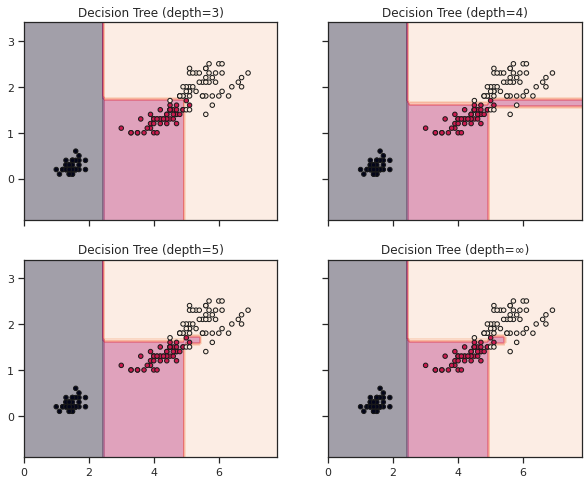

In [99]:
CART_region_plot(2,3)

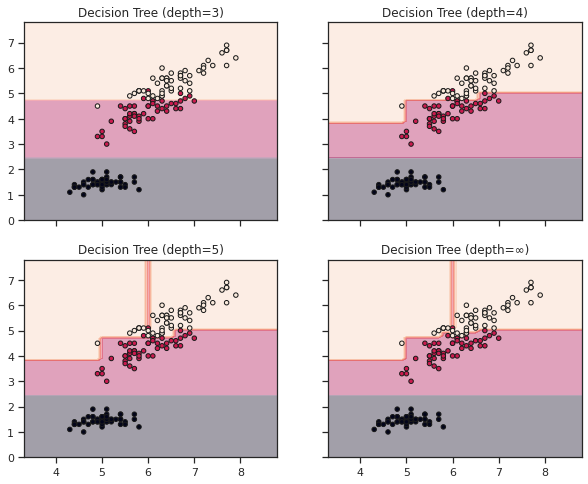

In [100]:
CART_region_plot(0,2)

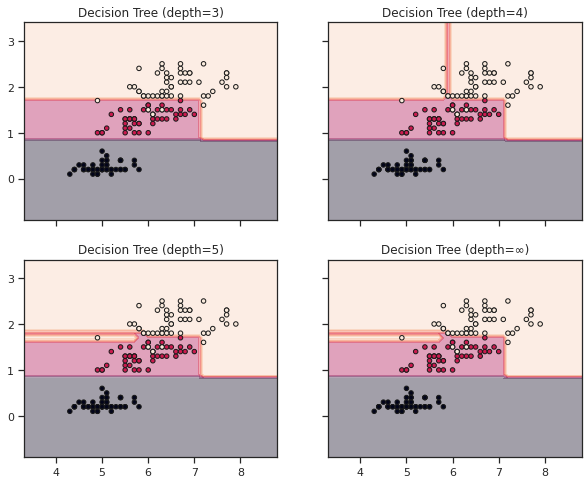

In [101]:
CART_region_plot(0,3)

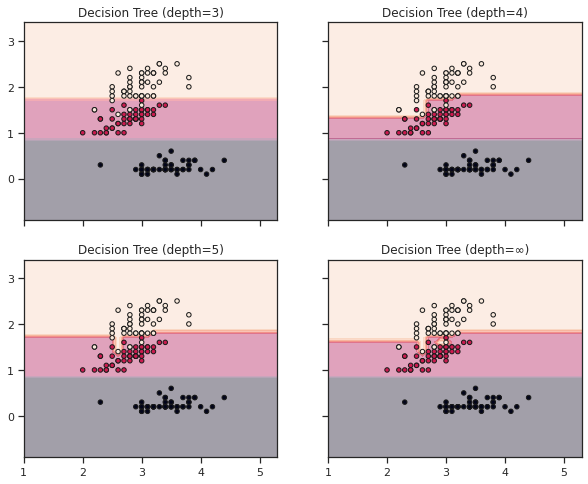

In [102]:
CART_region_plot(1,3)

根据上述不同决策树深度对于决策树结果的影响可以看出：网格深度大雨max——depth>=5之后会更容易出现过拟合的现象，而为了提高决策树网络的精度，虽然max-depth=4也会出现过拟合的现象，但是可以提高网络精度，因此本次作业选择网络深度为4时比较合适的